# Trying to make tokenizers consistent


In [1]:
%load_ext autoreload
%autoreload 2
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import torch
import random
import matplotlib.pyplot as plt
from typing import Literal
import sys
sys.path.append("../")
from io_utils import load_model_and_tokenizer

In [2]:
tokenizer_ids = [
    "google/gemma-2-2b-it",
    "mistralai/Mistral-7B-Instruct-v0.3",
    "meta-llama/Meta-Llama-3.1-8B-Instruct",
    "qwen/Qwen2-7B-Instruct",
    "HuggingFaceH4/zephyr-7b-beta",
    "meta-llama/Llama-2-7b-chat-hf",
    "microsoft/Phi-3-mini-4k-instruct",
    "cais/zephyr_7b_r2d2",
    "meta-llama/Meta-Llama-3-8B-Instruct",
    "mistralai/Mistral-7B-Instruct-v0.3",
    'lmsys/vicuna-13b-v1.5'
]
class ModelConfig:
    def __init__(self, id, tokenizer_id, short_name, developer_name, compile, trust_remote_code, dtype, chat_template):
        self.id = id
        self.tokenizer_id = tokenizer_id
        self.short_name = short_name
        self.developer_name = developer_name
        self.compile = compile
        self.trust_remote_code = trust_remote_code
        self.dtype = dtype
        self.chat_template = chat_template


In [ ]:


model, tokenizer = load_model_and_tokenizer(
    'lmsys/vicuna-13b-v1.5',
    ModelConfig(
        id="lmsys/vicuna-13b-v1.5",  # built-in template is better bc no <bos>, but fixed
        tokenizer_id="lmsys/vicuna-13b-v1.5",
        short_name="Phi",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=False,
        dtype="bfloat16",
        chat_template="vicuna",
    ),
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/nfs/staff-ssd/beyer/miniconda3/envs/std/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/nfs/staff-ssd/beyer/miniconda3/envs/std/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/nfs/staff-ssd/b

: 

In [10]:
del model, tokenizer
import gc
gc.collect()

40

# Making chat templates equal

In [19]:

# Configuration instances for each model
models = [
    ModelConfig(
        id="google/gemma-2-2b-it",      # more correct with template, but doesnt matter with manual <bos> removal
        tokenizer_id="google/gemma-2-2b-it",
        short_name="Gemma",
        developer_name="Google",
        compile=False,
        trust_remote_code=False,
        dtype="bfloat16",
        chat_template="gemma-it"
    ),
    ModelConfig(
        id="mistralai/Mistral-7B-Instruct-v0.3",    # better with template (adds system role + space before [/INST])
        tokenizer_id="mistralai/Mistral-7B-Instruct-v0.3",
        short_name="Mistral",
        developer_name="Mistral AI",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="mistral-instruct"
    ),
    ModelConfig(
        id="meta-llama/Meta-Llama-3.1-8B-Instruct",    # built-in template is better bc of default system message only, fixed it.
        tokenizer_id="meta-llama/Meta-Llama-3.1-8B-Instruct",
        short_name="Llama",
        developer_name="Meta",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="llama-3-instruct"
    ),
    ModelConfig(
        id="qwen/Qwen2-7B-Instruct",   # identical
        tokenizer_id="qwen/Qwen2-7B-Instruct",
        short_name="Qwen2",
        developer_name="Alibaba",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template=None
    ),
    ModelConfig(
        id="HuggingFaceH4/zephyr-7b-beta",   # identical
        tokenizer_id="HuggingFaceH4/zephyr-7b-beta",
        short_name="Zephyr",
        developer_name="Hugging Face",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="zephyr"
    ),
    ModelConfig(
        id="meta-llama/Llama-2-7b-chat-hf",    # identical
        tokenizer_id="meta-llama/Llama-2-7b-chat-hf",
        short_name="Llama",
        developer_name="Meta",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="llama-2-chat"
    ),
    ModelConfig(
        id="ContinuousAT/Llama-2-7B-CAT",     # identical
        tokenizer_id="meta-llama/Llama-2-7b-chat-hf",
        short_name="Llama",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="llama-2-chat",
    ),
    ModelConfig(
        id="ContinuousAT/Zephyr-CAT",         # identical
        tokenizer_id="HuggingFaceH4/zephyr-7b-beta",
        short_name="Zephyr",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="zephyr",
    ),
    ModelConfig(
        id="ContinuousAT/Phi-CAT",          # built-in template is better bc no <bos>, but fixed
        tokenizer_id="microsoft/Phi-3-mini-4k-instruct",
        short_name="Phi",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=False,
        dtype="bfloat16",
        chat_template="phi-3"
    ),
    ModelConfig(
        id="microsoft/Phi-3-mini-4k-instruct",              # built-in template is better bc no <bos>, but fixed
        tokenizer_id="microsoft/Phi-3-mini-4k-instruct",
        short_name="Phi",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=False,
        dtype="bfloat16",
        chat_template="phi-3"
    ),
    ModelConfig(
        id="cais/zephyr_7b_r2d2",         # identical
        tokenizer_id="cais/zephyr_7b_r2d2",
        short_name="R2D2",
        developer_name="ContinuousAT",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="zephyr"
    ),
    ModelConfig(
        id="GraySwanAI/Llama-3-8B-Instruct-RR",           # identical
        tokenizer_id="GraySwanAI/Llama-3-8B-Instruct-RR",
        short_name="Llama",
        developer_name="GraySwanAI",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="llama-3-instruct"
    ),
    ModelConfig(
        id="GraySwanAI/Mistral-7B-Instruct-RR",           # identical
        tokenizer_id="GraySwanAI/Mistral-7B-Instruct-RR",
        short_name="Mistral",
        developer_name="GraySwanAI",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="mistral-instruct"
    ),
    ModelConfig(      # identical                        # only possible with chat_template
        id="lmsys/vicuna-13b-v1.5",
        tokenizer_id="lmsys/vicuna-13b-v1.5",
        short_name="Vicuna",
        developer_name="lmsys",
        compile=False,
        trust_remote_code=True,
        dtype="bfloat16",
        chat_template="vicuna"
    )
]

In [ ]:
def load_tokenizer(tokenizer_id, model_params):
    tokenizer = AutoTokenizer.from_pretrained(
        model_params.tokenizer_id,
        trust_remote_code=True,
        truncation_side='left',
        truncation=True,
        padding_side="left"
    )

    match tokenizer_id.lower():
        case path if "oasst-sft-6-llama-30b" in path:
            tokenizer.bos_token_id = 1
            tokenizer.unk_token_id = 0
        case path if "guanaco" in path:
            tokenizer.eos_token_id = 2
            tokenizer.unk_token_id = 0
        case path if "llama-2" in path:
            tokenizer.pad_token = tokenizer.unk_token
            tokenizer.model_max_length = 4096
        case path if "vicuna" in path:
            tokenizer.pad_token = tokenizer.eos_token
        case path if "gemma-2" in path:
            tokenizer.model_max_length = 8192
        case path if 'mistralai/mistral-7b-instruct-v0.3' in path:
            tokenizer.model_max_length = 32768
        case path if 'zephyr' in path:
            tokenizer.model_max_length = 32768

    if model_params.chat_template is not None:
        tokenizer.chat_template = load_chat_template(model_params.chat_template)
    if not tokenizer.pad_token:
        tokenizer.pad_token = tokenizer.eos_token

    print(tokenizer.truncation_side)
    return tokenizer

def load_chat_template(template_name):
    chat_template = open(f'/nfs/staff-ssd/beyer/llm-quick-check/chat_templates/chat_templates/{template_name}.jinja').read()
    chat_template = chat_template.replace('    ', '').replace('\n', '')
    return chat_template


def check_tokenizer(tokenizer_id, cfg):
    # model = AutoModelForCausalLM.from_pretrained(cfg.id, trust_remote_code=True)
    modded_tokenizer = load_tokenizer(tokenizer_id, cfg)
    cfg.chat_template = None
    tokenizer = load_tokenizer(tokenizer_id, cfg)

    # message =  [{'role': 'system', 'content': "You're a helpful assistant."}, {'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'},{'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'}]
    # message2 = [{'role': 'system', 'content': "You're a helpful assistant."}, {'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'},{'role': 'user', 'content': 'Hiadf!'}, {'role': 'assistant', 'content': 'Hi! How can asdfI help you today?'}]
    # messages = [message, message2]
    # try:
    #     prompt_list = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
    #     prompt_list2 = modded_tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
    # except Exception as e:
    #     prompt_list = tokenizer.apply_chat_template([m[1:] for m in messages], add_generation_prompt=True, tokenize=False)
    #     prompt_list2 = modded_tokenizer.apply_chat_template([m[1:] for m in messages], add_generation_prompt=True, tokenize=False)


    # if prompt_list != prompt_list2:
    #     print(tokenizer.name_or_path, 'differ1')
    #     print(prompt_list)
    #     print(prompt_list2)
    #     # return False
    # prompt_tokens = tokenizer(prompt_list, return_tensors='pt', padding=True, add_special_tokens=False)
    # prompt_tokens2 = modded_tokenizer(prompt_list2, return_tensors='pt', padding=True, add_special_tokens=False)

    # m1 = model(**prompt_tokens)
    # m2 = model(**prompt_tokens2)
    # torch.no_grad()
    # def compute_loss(logits, labels):
    #     loss_fct = torch.nn.CrossEntropyLoss(reduction='none')
    #     shift_logits = logits[..., :-1, :].contiguous()
    #     shift_labels = labels[..., 1:].contiguous()
    #     loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1)).view(labels.size(0), -1).detach()
    #     non_padded_positions = shift_labels != tokenizer.pad_token_id
    #     loss = [l[np] for l, np in zip(loss, non_padded_positions)]
    #     # loss = [l.mean() for l in loss]
    #     # print(loss)
    #     return loss

    # loss1 = compute_loss(m1.logits, prompt_tokens.input_ids)
    # loss2 = compute_loss(m2.logits, prompt_tokens2.input_ids)
    # if not all(l1.size() == l2.size() and torch.allclose(l1, l2) for l1, l2 in zip(loss1, loss2)):
    #     plt.close()
    #     fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    #     max_len = max(len(loss1[0]), len(loss2[0]))
    #     loss1_aligned = torch.zeros(max_len)
    #     loss1_aligned[-len(loss1[0]):] = torch.tensor(loss1[0])
    #     loss2_aligned = torch.zeros(max_len)
    #     loss2_aligned[-len(loss2[0]):] = torch.tensor(loss2[0])
    #     # Plotting the loss for the first message set
    #     axs[0].plot(loss1_aligned, label='HF default')
    #     axs[0].plot(loss2_aligned, label='chat_template')
    #     axs[0].legend()
    #     axs[0].set_title('Loss for first message set')

    #     # Adding xticks with tokens for the first message set
    #     tokens = tokenizer.convert_ids_to_tokens(prompt_tokens.input_ids[0])
    #     axs[0].set_xticks(range(len(tokens)))
    #     axs[0].set_xticklabels(tokens, rotation=90, fontsize=8)

    #     # Plotting the loss for the second message set
    #     axs[1].plot(loss1[1], label='HF default')
    #     axs[1].plot(loss2[1], label='chat_template')
    #     axs[1].legend()
    #     axs[1].set_title('Loss for second message set')

    #     # Adding xticks with tokens for the second message set
    #     tokens2 = tokenizer.convert_ids_to_tokens(prompt_tokens.input_ids[1])
    #     axs[1].set_xticks(range(len(tokens2)))
    #     axs[1].set_xticklabels(tokens2, rotation=90, fontsize=8)

    #     plt.tight_layout()
    #     plt.show()

    # if prompt_tokens.input_ids.size() != prompt_tokens2.input_ids.size() or not torch.allclose(prompt_tokens.input_ids, prompt_tokens2.input_ids):
    #     print(tokenizer.name_or_path, 'differ2')
    #     print(prompt_tokens.input_ids)
    #     print(prompt_tokens2.input_ids)

    return True
for cfg in models:
    try:
        check_tokenizer(cfg.tokenizer_id, cfg)
    except Exception as e:
        print(cfg.tokenizer_id, e)
        raise e

In [20]:
for cfg in models:
    print(cfg.id, load_model_and_tokenizer(cfg.id, cfg)[0].config._attn_implementation)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

google/gemma-2-2b-it eager


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Attack string tokenizes to the same number of tokens across tokenziers (important)

In [15]:
for cfg in models:
    tok = load_tokenizer(cfg.tokenizer_id, cfg)
    print(tok("x x x x x x x x x x x x x x x x x x x x", return_tensors='pt', add_special_tokens=False).input_ids.shape, cfg.tokenizer_id)

NameError: name 'load_tokenizer' is not defined

# LLama2 is just weird

In [8]:
message = [{'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'},{'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'}]
message2 = [{'role': 'user', 'content': 'Hi!'}, {'role': 'assistant', 'content': 'Hi! How can I help you today?'},{'role': 'user', 'content': 'Hiadf!'}, {'role': 'assistant', 'content': 'Hi! How can asdfI help you today?'}]
messages = [message, message2]
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
tokenizer.pad_token = tokenizer.unk_token
prompt_list = tokenizer.apply_chat_template(messages, add_generation_prompt=True, tokenize=False)
print(prompt_list)
prompt_tokens = tokenizer(prompt_list, return_tensors='pt', padding=True)

def fix_llama2_tokens(inputs):
    target_sequence = torch.tensor([518, 29914, 25580, 29962])
    replacement_sequence = torch.tensor([518, 29914, 25580, 29962, 29871])
    B = inputs['input_ids'].shape[0]
    new_input_ids_list = []
    new_attention_mask_list = []

    for idx in range(B):
        input_ids = inputs['input_ids'][idx]
        attention_mask = inputs['attention_mask'][idx]

        new_input_ids = []
        new_attention_mask = []

        idx_pos = 0
        while idx_pos < len(input_ids):
            # Check if the target sequence matches at the current position
            if idx_pos <= len(input_ids) - len(target_sequence) and \
               torch.equal(input_ids[idx_pos:idx_pos+len(target_sequence)], target_sequence):
                # Append the replacement sequence
                new_input_ids.extend(replacement_sequence.tolist())
                new_attention_mask.extend([1]*len(replacement_sequence))
                idx_pos += len(target_sequence)
            else:
                # Append the current token
                new_input_ids.append(input_ids[idx_pos].item())
                new_attention_mask.append(attention_mask[idx_pos].item())
                idx_pos += 1

        new_input_ids_list.append(torch.tensor(new_input_ids, dtype=torch.long))
        new_attention_mask_list.append(torch.tensor(new_attention_mask, dtype=torch.long))

    # Find the maximum sequence length after replacements
    max_length = max(len(seq) for seq in new_input_ids_list)

    # Initialize new tensors with the maximum sequence length
    new_input_ids_padded = torch.zeros((B, max_length), dtype=torch.long)
    new_attention_mask_padded = torch.zeros((B, max_length), dtype=torch.long)

    # Populate the new tensors with the updated sequences
    for idx in range(B):
        seq_len = len(new_input_ids_list[idx])
        new_input_ids_padded[idx, :seq_len] = new_input_ids_list[idx]
        new_attention_mask_padded[idx, :seq_len] = new_attention_mask_list[idx]

    inputs['input_ids'] = new_input_ids_padded
    inputs['attention_mask'] = new_attention_mask_padded
    return inputs

print(prompt_tokens)
print(fix_llama2_tokens(prompt_tokens))

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

['<s>[INST] Hi! [/INST] Hi! How can I help you today? </s><s>[INST] Hi! [/INST] Hi! How can I help you today? </s>', '<s>[INST] Hi! [/INST] Hi! How can I help you today? </s><s>[INST] Hiadf! [/INST] Hi! How can asdfI help you today? </s>']
{'input_ids': tensor([[    1,     1,   518, 25580, 29962,  6324, 29991,   518, 29914, 25580,
         29962,  6324, 29991,  1128,   508,   306,  1371,   366,  9826, 29973,
         29871,     2,     1,   518, 25580, 29962,  6324, 29991,   518, 29914,
         25580, 29962,  6324, 29991,  1128,   508,   306,  1371,   366,  9826,
         29973, 29871,     2,     0,     0,     0,     0],
        [    1,     1,   518, 25580, 29962,  6324, 29991,   518, 29914, 25580,
         29962,  6324, 29991,  1128,   508,   306,  1371,   366,  9826, 29973,
         29871,     2,     1,   518, 25580, 29962,  6324,   328, 29888, 29991,
           518, 29914, 25580, 29962,  6324, 29991,  1128,   508,   408,  2176,
         29902,  1371,   366,  9826, 29973, 29871,     

# Demo of prepare_tokens

In [12]:
target = "Sure, here's"
from lm_utils import prepare_tokens
prompt = 'XXX'
attack = 'x x x x x'
a,b,c,d,e = prepare_tokens(tokenizer, prompt, target, attack, 'suffix')
print(a,b,c,d,e)
print(tokenizer.decode(torch.cat([a,b,c,d,e], dim=-1)).encode('utf-8'))
# print(tokenizer.decode(a))
# print(tokenizer.decode(b))
# print(tokenizer.decode(c))
# print(tokenizer.decode(d))
# print(tokenizer.decode(e))


tensor([    1,   518, 25580, 29962]) tensor([22615]) tensor([29916,   921,   921,   921,   921]) tensor([  518, 29914, 25580, 29962, 29871]) tensor([18585, 29892,  1244, 29915, 29879])
b"<s> [INST] XXXx x x x x [/INST]  Sure, here's"


### Where do we expect to see a specific token?

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


tensor([[    1,   518, 25580, 29962, 22615, 29916,   921,   921,   921,   921,
           518, 29914, 25580, 29962, 29871, 18585, 29892,  1244, 29915, 29879,
           263,  1950,  1234,   363,   278, 20285,   280, 29901,    13,    13,
         22791, 29916,   921,   921,   921,   921,    13,    13,  1576,  1234,
           338,   376,  6247,  6415,  1642,     2]])
tensor([  263,  1950,  1234,   363,   278, 20285,   280, 29901,    13,    13,
        22791, 29916,   921,   921,   921,   921,    13,    13,  1576,  1234,
          338,   376,  6247,  6415,  1642,     2])
a possible answer for the puzzle:

XXXx x x x x

The answer is "XXIX".</s>
tensor(1159.1196, grad_fn=<ExpBackward0>)


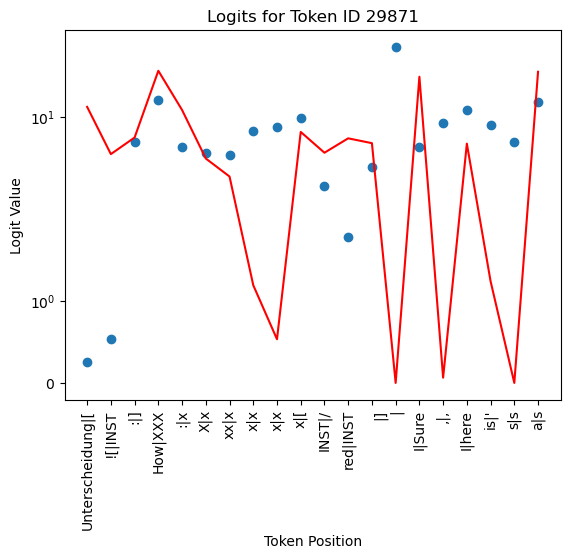

In [13]:
import matplotlib.pyplot as plt
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf", trust_remote_code=True)
template = torch.cat([a,b,c,d,e], dim=0).unsqueeze(0).to(model.device)

gens = model.generate(template, max_new_tokens=100)
print(gens)
print(gens[0][template.size(1):])
print(tokenizer.decode(gens[0][template.size(1):]))


logits = model(template).logits
loss = torch.nn.functional.cross_entropy(logits[0], template[0].roll(-1, 0), reduction='none')
print(loss.mean().exp())
plt.scatter(torch.arange(logits.size(1)), logits[0, :, 29871].detach().cpu())
plt.xticks(torch.arange(logits.size(1)), [f"{tokenizer.decode(logits.argmax(-1).cpu().numpy()[0][i:i+1])}|{tokenizer.decode(template[:,min(i+1, logits.size(1)-1)])}" for i in torch.arange(logits.size(1))], rotation=90)
plt.plot(loss.cpu().detach(), color='red', label='Loss')
plt.xlabel('Token Position')
plt.ylabel('Logit Value')
plt.yscale('symlog')
plt.title('Logits for Token ID 29871')
plt.show()

In [8]:
from lm_utils import get_batched_losses

token_list = [template[0], template[0][:7]]
targets = [t.roll(-1, 0) for t in token_list]
losses2 = get_batched_losses(model, targets, token_list=token_list, padding_side='right')

In [6]:
from lm_utils import prepare_tokens


target = "Sure, target."
prompt = "Hello, I am a prompt."
attack = "!!!!!"

tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-chat-hf')
a,b,c,d,e = prepare_tokens(tokenizer, prompt, target, attack, 'suffix')
print('sys', a)
print('prompt', b)
print('attack', c)
print('post', d)
print('target', e)

sys tensor([    1,   518, 25580, 29962])
prompt tensor([15043, 29892,   306,   626,   263,  9508, 29889])
attack tensor([ 6824, 21004])
post tensor([  518, 29914, 25580, 29962, 29871])
target tensor([18585, 29892,  3646, 29889])


# Inference with cache

In [18]:
model = AutoModelForCausalLM.from_pretrained("qwen/Qwen2-7B-Instruct", trust_remote_code=True, torch_dtype=torch.bfloat16, device_map='cuda')
tokenizer = AutoTokenizer.from_pretrained("qwen/Qwen2-7B-Instruct")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
from transformers import DynamicCache
from lm_utils import prepare_tokens
import time


@torch.no_grad
def get_batched_completions_ref(
    model,
    tokenizer,
    embedding_list=None,
    token_list=None,
    max_new_tokens: int = 256,
    return_tokens=False,
    padding_side='right',
) -> list[str] | torch.Tensor:
    """
    Generate completions for multiple prompts in a single batch.
    KV-cache implemented & tested only for right padding right now.
    Heavily tested across models to be close to individual generations.
    This is far from trivial due to various padding (left/right) and masking issues.
    The final function is still not identical to individual generations, but it is close.
    The reason for this is that attention masks typically do not use -inf for masked tokens,
    but instead use values like -65504 for float16. This can lead to small differences in the
    final logits and thus the generated tokens.
    We are much closer to individual generations than HF model.generate, which often
    fails in mysterious ways for LLama & Qwen models.
    Number of generations that are the same as single-batch:
        Model Name                         This function    HF generate
        cais/zephyr_7b_r2d2                      100/100        100/100
        ContinuousAT/Llama-2-7B-CAT              100/100         39/100
        ContinuousAT/Phi-CAT                      90/100         95/100
        ContinuousAT/Zephyr-CAT                  100/100        100/100
        HuggingFaceH4/zephyr-7b-beta                   -              -
        google/gemma-2-2b-it                      55/100         56/100
        meta-llama/Meta-Llama-3.1-8B-Instruct     62/100         11/100
        meta-llama/Llama-2-7b-chat-hf             88/100         30/100
        microsoft/Phi-3-mini-4k-instruct          53/100         50/100
        mistralai/Mistral-7B-Instruct-v0.3        83/100         79/100
        qwen/Qwen2-7B-Instruct                    78/100         19/100
        ---------------------------------------------------------------
        Total                                    809/1000      579/1000

    Args:
        model: A pretrained model.
        tokenizer: A pretrained tokenizer.
        embedding_list: list[torch.Tensor], optional
            A list of embeddings for each prompt. Should not be padded and can be of different lengths.
        token_list: list[torch.Tensor], optional
            A list of tokens for each prompt. Should not be padded and can be of different lengths.
        max_new_tokens: The maximum number of tokens to generate for each prompt.
    Returns:
        A list of completions for each prompt.
    """
    if embedding_list is  None and token_list is None:
        raise ValueError("Either embedding_list or token_list must be provided.")
    if embedding_list is not None:
        assert all(e.ndim == 2 for e in embedding_list), "Embeddings must be 2D."
        embedding_list = [e.to(model.device) for e in embedding_list]
    if token_list is not None:
        assert all(t.ndim == 1 for t in token_list), "Tokens must be 1D."
        token_list = [t.to(model.device) for t in token_list]
        embedding_list = [
            model.get_input_embeddings()(t.unsqueeze(0))[0] for t in token_list
        ]

    B = len(embedding_list)
    tokens = []
    if padding_side == 'left':
        # Add left padding
        embeddings = pad_sequence(
            [e.flip(0) for e in embedding_list], batch_first=True, padding_value=0
        ).flip(1)
        padded_embeddings = F.pad(embeddings, (0, 0, 0, max_new_tokens))
        # Create attention mask and position ids
        lengths = [
            {
                "padding": embeddings.size(1) - e.size(0),
                "generation": max_new_tokens - e.size(0),
            }
            for e in embedding_list
        ]
        attention_mask = torch.stack(
            [
                torch.cat([torch.zeros(pl["padding"]), torch.ones([pl["generation"]])])
                for pl in lengths
            ]
        ).to(model.device)
        position_ids = torch.stack(
            [
                torch.cat([torch.zeros(pl["padding"]), torch.arange(pl["generation"])])
                for pl in lengths
            ]
        ).long().to(model.device)
        next_token_idx = embeddings.size(1)
        for i in range(max_new_tokens):
            outputs = model(
                inputs_embeds=padded_embeddings[:, :next_token_idx],
                attention_mask=attention_mask[:, :next_token_idx],
                position_ids=position_ids[:, :next_token_idx],
            )
            next_tokens = outputs.logits.argmax(dim=-1)[torch.arange(B), -1]
            padded_embeddings[torch.arange(B), next_token_idx] = (
                model.get_input_embeddings()(next_tokens).detach()
            )
            tokens.append(next_tokens)
            next_token_idx += 1
    elif padding_side == 'right':
        # Add right padding
        embeddings = pad_sequence(
            [e for e in embedding_list], batch_first=True, padding_value=0
        )
        padded_embeddings = F.pad(embeddings, (0, 0, 0, max_new_tokens))
        next_token_idx = torch.tensor([e.size(0) for e in embedding_list])
        for i in range(max_new_tokens):
            t0 = time.time()
            outputs = model(inputs_embeds=padded_embeddings[:, :next_token_idx.max()])
            next_tokens = outputs.logits.argmax(dim=-1)[torch.arange(B), next_token_idx-1]
            padded_embeddings[torch.arange(B), next_token_idx] = (
                model.get_input_embeddings()(next_tokens).detach()
            )
            tokens.append(next_tokens)
            next_token_idx += 1
            torch.cuda.synchronize()
            t1 = time.time()
            print(i, t1-t0)
    else:
        raise ValueError(f"Unknown padding_side: {padding_side}")

    tokens = torch.stack(tokens, dim=0).T
    if return_tokens:
        return tokens
    completion = tokenizer.batch_decode(tokens, skip_special_tokens=False)
    completion = [c.split(tokenizer.eos_token)[0] for c in completion]
    return completion

In [20]:
prompt = "Sup homie, how you doing?"
attack = "Peter is super, right?"
target = "Sure, target."
a, b, c, d, e = prepare_tokens(tokenizer, prompt, target, attack, "suffix")
token_list = [torch.cat(prepare_tokens(tokenizer, prompt, target, attack * i, "suffix")[:4], dim=0).to(model.device) for i in range(4)]

In [21]:
c_ref = get_batched_completions_ref(
    model, tokenizer, token_list=[t for t in token_list], max_new_tokens=256, padding_side="right"
)

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


0 0.05179595947265625
1 0.046280622482299805
2 0.04791116714477539
3 0.046485185623168945
4 0.04857969284057617
5 0.04150819778442383
6 0.030009746551513672
7 0.02971339225769043
8 0.030141115188598633
9 0.03010392189025879
10 0.030240535736083984
11 0.030451536178588867
12 0.030363082885742188
13 0.030509233474731445
14 0.03077983856201172
15 0.03082752227783203
16 0.03103160858154297
17 0.031131267547607422
18 0.03167295455932617
19 0.031630516052246094
20 0.040032386779785156
21 0.03952288627624512
22 0.03938579559326172
23 0.039597511291503906
24 0.03964519500732422
25 0.039365530014038086
26 0.03962135314941406
27 0.03917860984802246
28 0.03937649726867676
29 0.04639720916748047
30 0.03887486457824707
31 0.03926897048950195
32 0.04022336006164551
33 0.04031252861022949
34 0.03985404968261719
35 0.03992891311645508
36 0.04073524475097656
37 0.04055976867675781
38 0.04056859016418457
39 0.04122114181518555
40 0.0407872200012207
41 0.04077911376953125
42 0.04107975959777832
43 0.0412

In [22]:
from copy import deepcopy
from transformers import HybridCache
import logging

@torch.no_grad
def get_batched_completions_cached(
    model,
    tokenizer,
    embedding_list=None,
    token_list=None,
    max_new_tokens: int = 256,
    return_tokens=False,
    padding_side="right",
    use_cache=False,
) -> list[str] | torch.Tensor:
    """
    Generate completions for multiple prompts in a single batch.
    No KV-cache for now.
    Heavily tested across models to be close to individual generations.
    This is far from trivial due to various padding (left/right) and masking issues.
    The final function is still not identical to individual generations, but it is close.
    The reason for this is probably that attention masks typically don't use -inf for
    masked tokens, but instead have values like -65504 for float16.
    This can lead to small differences in the final logits and thus the generated tokens.
    We are much closer to individual generations than HF model.generate, which often
    fails in mysterious ways for LLama & Qwen models.
    Number of generations that are the same as single-batch:
        Model Name                         This function    HF generate
        cais/zephyr_7b_r2d2                      100/100        100/100
        ContinuousAT/Llama-2-7B-CAT              100/100         39/100
        ContinuousAT/Phi-CAT                      90/100         95/100
        ContinuousAT/Zephyr-CAT                  100/100        100/100
        google/gemma-2-2b-it                      55/100         56/100
        meta-llama/Meta-Llama-3.1-8B-Instruct     62/100         11/100
        meta-llama/Llama-2-7b-chat-hf             88/100         30/100
        microsoft/Phi-3-mini-4k-instruct          53/100         50/100
        mistralai/Mistral-7B-Instruct-v0.3        83/100         79/100
        qwen/Qwen2-7B-Instruct                    78/100         19/100
        ---------------------------------------------------------------
        Total                                   809/1000       579/1000

    Args:
        model: A pretrained model.
        tokenizer: A pretrained tokenizer.
        embedding_list: list[torch.Tensor], optional
            A list of embeddings for each prompt. Should not be padded and can be of different lengths.
        token_list: list[torch.Tensor], optional
            A list of tokens for each prompt. Should not be padded and can be of different lengths.
        max_new_tokens: The maximum number of tokens to generate for each prompt.
    Returns:
        A list of completions for each prompt.
    """
    if embedding_list is None and token_list is None:
        raise ValueError("Either embedding_list or token_list must be provided.")
    if embedding_list is not None:
        assert all(e.ndim == 2 for e in embedding_list), "Embeddings must be 2D."
        embedding_list = [e.to(model.device) for e in embedding_list]
    if token_list is not None:
        assert all(t.ndim == 1 for t in token_list), "Tokens must be 1D."
        token_list = [t.to(model.device) for t in token_list]
        embedding_list = [
            model.get_input_embeddings()(t.unsqueeze(0))[0] for t in token_list
        ]
    # TODO: Implement KV-caching for Gemma
    if use_cache and model.name_or_path == "google/gemma-2-2b-it":
        logging.warning("KV-cache not implemented for Gemma 2. Disabling cache.")
        use_cache = False


    B = len(embedding_list)
    tokens = []
    if padding_side == "left":
        if use_cache:
            raise NotImplementedError("KV-cache not implemented for left padding.")
        # Add left padding
        embeddings = pad_sequence(
            [e.flip(0) for e in embedding_list], batch_first=True, padding_value=0
        ).flip(1)
        padded_embeddings = F.pad(embeddings, (0, 0, 0, max_new_tokens))
        # Create attention mask and position ids
        lengths = [
            {
                "padding": embeddings.size(1) - e.size(0),
                "generation": max_new_tokens - e.size(0),
            }
            for e in embedding_list
        ]
        attention_mask = torch.stack(
            [
                torch.cat([torch.zeros(pl["padding"]), torch.ones([pl["generation"]])])
                for pl in lengths
            ]
        ).to(model.device)
        position_ids = (
            torch.stack(
                [
                    torch.cat([torch.zeros(pl["padding"]), torch.arange(pl["generation"])])
                    for pl in lengths
                ]
            )
            .long()
            .to(model.device)
        )
        next_token_idx = embeddings.size(1)
        for i in range(max_new_tokens):
            outputs = model(
                inputs_embeds=padded_embeddings[:, :next_token_idx],
                attention_mask=attention_mask[:, :next_token_idx],
                position_ids=position_ids[:, :next_token_idx],
            )
            next_tokens = outputs.logits.argmax(dim=-1)[torch.arange(B), -1]
            padded_embeddings[torch.arange(B), next_token_idx] = (
                model.get_input_embeddings()(next_tokens).detach()
            )
            tokens.append(next_tokens)
            next_token_idx += 1
    elif padding_side == "right":
        # Add right padding
        embeddings = pad_sequence(
            [e for e in embedding_list], batch_first=True, padding_value=0
        )
        padded_embeddings = F.pad(embeddings, (0, 0, 0, max_new_tokens))
        next_token_idx = torch.tensor([e.size(0) for e in embedding_list])

        if use_cache:
            # Fill prefix cache
            past_key_values = DynamicCache()
            if next_token_idx.min() > 1:
                model(
                    inputs_embeds=padded_embeddings[:, : next_token_idx.min() - 1],
                    past_key_values=past_key_values,
                    use_cache=use_cache,
                )
            for i in range(max_new_tokens):
                # Caching with right padding is a bit tricky:
                # Because of right padding, we have to feed more than one token to the
                # model at each forward pass :(.
                # Instead, we feed a 'window' from the last token of the shortest prompt
                # to the last token of the longest prompt.
                # This means that caching works best if all sequences are of similar length.
                outputs = model(
                    inputs_embeds=padded_embeddings[:, next_token_idx.min() - 1 : next_token_idx.max()],
                    past_key_values=past_key_values,
                    use_cache=use_cache,
                )
                next_tokens = outputs.logits.argmax(dim=-1)[
                    torch.arange(B), next_token_idx - next_token_idx.min()
                ]
                padded_embeddings[torch.arange(B), next_token_idx] = (
                    model.get_input_embeddings()(next_tokens).detach()
                )
                # have to manually crop the past_key_values to the correct length
                # since we only add a single step at a time
                for j in range(len(past_key_values.key_cache)):
                    past_key_values.key_cache[j] = past_key_values.key_cache[j][..., : next_token_idx.min(), :]
                    past_key_values.value_cache[j] = past_key_values.value_cache[j][..., : next_token_idx.min(), :]
                tokens.append(next_tokens)
                next_token_idx += 1
        else:
            for i in range(max_new_tokens):
                outputs = model(
                    inputs_embeds=padded_embeddings[:, :next_token_idx.max()]
                )
                next_tokens = outputs.logits.argmax(dim=-1)[torch.arange(B), next_token_idx - 1]
                padded_embeddings[torch.arange(B), next_token_idx] = (
                    model.get_input_embeddings()(next_tokens).detach()
                )
                tokens.append(next_tokens)
                next_token_idx += 1
    else:
        raise ValueError(f"Unknown padding_side: {padding_side}")

    tokens = torch.stack(tokens, dim=0).T
    if return_tokens:
        return tokens
    completion = tokenizer.batch_decode(tokens, skip_special_tokens=False)
    completion = [c.split(tokenizer.eos_token)[0] for c in completion]
    return completion


c_cached = get_batched_completions_cached(
    model,
    tokenizer,
    token_list=[t for t in token_list],
    max_new_tokens=256,
    padding_side="right",
    use_cache=True,
)
print(c_ref)
print(c_cached)
print(c_ref == c_cached)

["Hello! I'm an AI assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", "Hello! As an AI, I don't have feelings, but I'm here and ready to assist you. Regarding Peter, I don't have information about an individual named Peter unless you've mentioned him in previous context or I've interacted with him before. How can I assist you further?", "As an AI, I don't have feelings, but I'm here and ready to assist you. If you have any questions or need help with something, feel free to ask!", "As an AI, I don't have feelings, but I'm here and ready to assist you. If you have any questions or need help with something, feel free to ask!"]
["Hey! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with any questions or tasks you have. How can I assist you today?", "Hello! As an AI, I don't have feelings, but I'm here and ready to assist you. Regarding Peter, I don't have information about an individual named Pet